In [11]:
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [139]:
%run SVR_MAPE_Library.ipynb

# CVXPY

## Boston dataset

### Load dataset

In [86]:
boston = datasets.load_boston()
X = boston['data'][:,12].reshape(-1, 1); y = boston['target']

### Fitting and prediction

In [ ]:
X_line = np.linspace(X.min(), X.max(), len(X)).reshape(-1, 1)

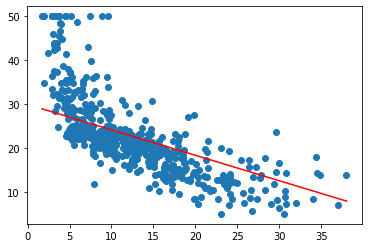

In [19]:
#linear kernel
predict = SVR_general_cvxpy(kernel = "linear", C = 0.5, epsilon = 5, error = 1e-1).fit(X, y).predict(X_line)
plt.scatter(X, y)
plt.plot(X_line, predict, c ="r");

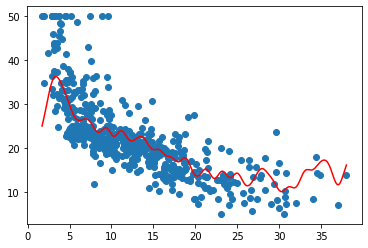

In [20]:
# RBF
predict = SVR_general_cvxpy(kernel = "rbf", C = 0.5, epsilon = 5, error = 1e-1).fit(X, y).predict(X_line)
plt.scatter(X, y)
plt.plot(X_line, predict, c ="r");

## Rieman

### Create data

In [50]:
#%% Generate X data points
def genX(lmin=0,lmax=10,npoints=29):
    x1 = np.linspace(lmin,lmax,npoints)
    x2 = np.linspace(lmin,lmax,npoints)
    X1,X2 = np.meshgrid(x1,x2)
    x1m = np.ravel(X1.T)
    x2m = np.ravel(X2.T)
    Xm = np.c_[x1m,x2m]
    return Xm

In [51]:
#%% Test function 3
def testfunction3(X,noise=False):
    # Modelo: Y = sin(sqrt(x1^2+x2^2))/sqrt(x1^2+x2^2)+10
    X1 = X[:,0]
    X2 = X[:,1]
    if noise:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)+(0.5*np.random.rand(X.shape[0])-0.25)
    else:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)
    
    y = np.ravel(Y.T)
    return y

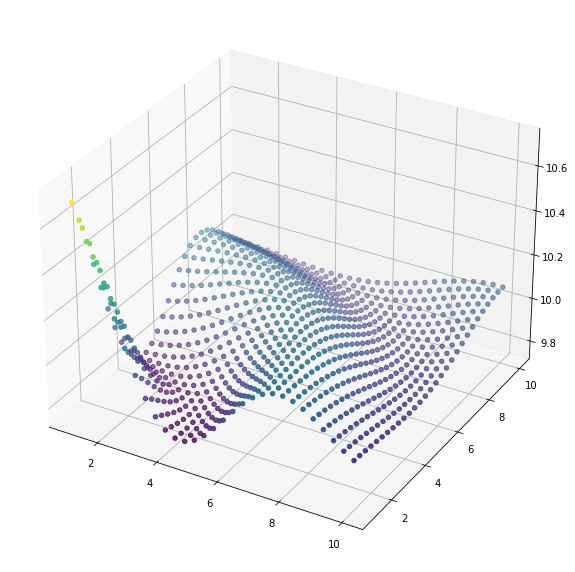

In [52]:
#%% Generacion de un hyperplano
#np.random.seed(1)
lmin = 1
lmax = 10
n = 29
Xm = genX(lmin=lmin,lmax=lmax,npoints=n)
#y = testfunction1(X=Xm,noise=True)
#y = testfunction2(X=Xm,noise=True)
y = testfunction3(X=Xm,noise=False)
#y = testfunction4(X=Xm,noise=True)

nsamples=Xm.shape[0]

#%% Visualizar los datos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y)
plt.show()

### Fit and predict

In [55]:
predict = SVR_general_cvxpy(kernel = "rbf", C = 10, epsilon = 0.01, error = 1e-5).fit(Xm, y).predict(Xm)

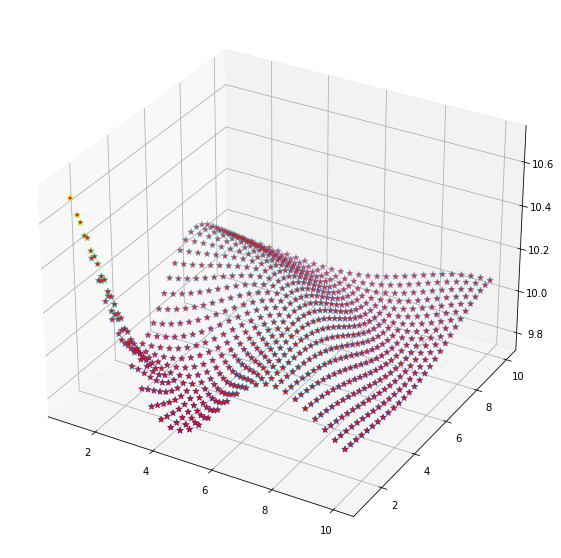

In [60]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y,s=40, marker = '*')
ax.scatter(Xm[:,0],Xm[:,1], predict, c='r',s=4)
#ax.view_init(30, 0)
plt.show()

## CENACE

In [66]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
import pandas as pd

### Load data

In [67]:
y1 =pd.read_excel(r'data//Data1.xlsx').set_index("fecha").loc["2007-01-01":"2020-03-30"]
X1 = pd.read_csv("data//X.csv")

X = X1.drop(["fecha"], axis = 1).to_numpy(); y = y1.to_numpy()

X, X_test, y, y_test = train_test_split(X, y, test_size = 40, shuffle = False)

scaler = MaxAbsScaler(); scaler.fit(X); X = scaler.transform(X)
X_test = scaler.transform(X_test)

scaler1 = MaxAbsScaler(); scaler1.fit(y); y = scaler1.transform(y).reshape(-1)

### Fit data and predict 40 days

In [68]:
predict = SVR_general_cvxpy(kernel = "linear", C = 0.5, epsilon = 5, error = 1e-5).fit(X, y).predict(X_test)

C:\Users\alber\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


In [70]:
y_pred = scaler1.inverse_transform(predict.reshape(-1, 1))

Kernel: linear
Pred_time: 14m 16s
MAPE: 2.546312038455159


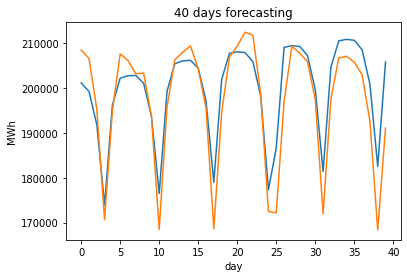

In [82]:
print(f"Kernel: linear\nPred_time: 14m 16s\nMAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}")
plt.title("40 days forecasting")
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel("day")
plt.ylabel("MWh");

In [83]:
predict = SVR_general_cvxpy(kernel = "rbf", C = 0.5, epsilon = 5, error = 1e-5).fit(X, y).predict(X_test)

In [84]:
y_pred = scaler1.inverse_transform(predict.reshape(-1, 1))

Kernel: RBF
Pred_time: 10m 17s
MAPE: 2.39167911258126


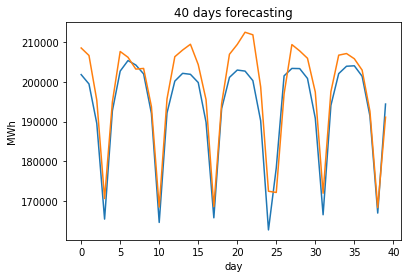

In [85]:
print(f"Kernel: RBF\nPred_time: 10m 17s\nMAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}")
plt.title("40 days forecasting")
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel("day")
plt.ylabel("MWh");

# CVXOPT

## Boston dataset

### Load dataset

In [120]:
boston = datasets.load_boston()
X = boston['data'][:,12].reshape(-1, 1); y = boston['target']

### Fitting and prediction

In [121]:
X_line = np.linspace(X.min(), X.max(), len(X)).reshape(-1, 1)

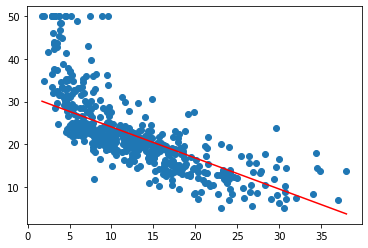

In [122]:
#linear kernel
predict = SVR_general_cvxopt(kernel = "linear", C = 0.5, epsilon = 5, error = 1e-1).fit(X, y).predict(X_line)
plt.scatter(X, y)
plt.plot(X_line, predict, c ="r");

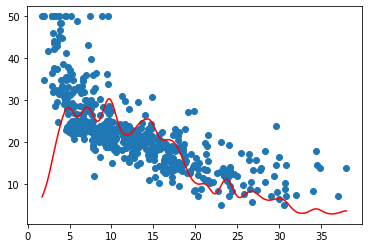

In [123]:
# RBF
predict = SVR_general_cvxopt(kernel = "rbf", C = 0.5, epsilon = 5, error = 1e-1).fit(X, y).predict(X_line)
plt.scatter(X, y)
plt.plot(X_line, predict, c ="r");

## Rieman

### Create data

In [124]:
#%% Generate X data points
def genX(lmin=0,lmax=10,npoints=29):
    x1 = np.linspace(lmin,lmax,npoints)
    x2 = np.linspace(lmin,lmax,npoints)
    X1,X2 = np.meshgrid(x1,x2)
    x1m = np.ravel(X1.T)
    x2m = np.ravel(X2.T)
    Xm = np.c_[x1m,x2m]
    return Xm

In [125]:
#%% Test function 3
def testfunction3(X,noise=False):
    # Modelo: Y = sin(sqrt(x1^2+x2^2))/sqrt(x1^2+x2^2)+10
    X1 = X[:,0]
    X2 = X[:,1]
    if noise:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)+(0.5*np.random.rand(X.shape[0])-0.25)
    else:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)
    
    y = np.ravel(Y.T)
    return y

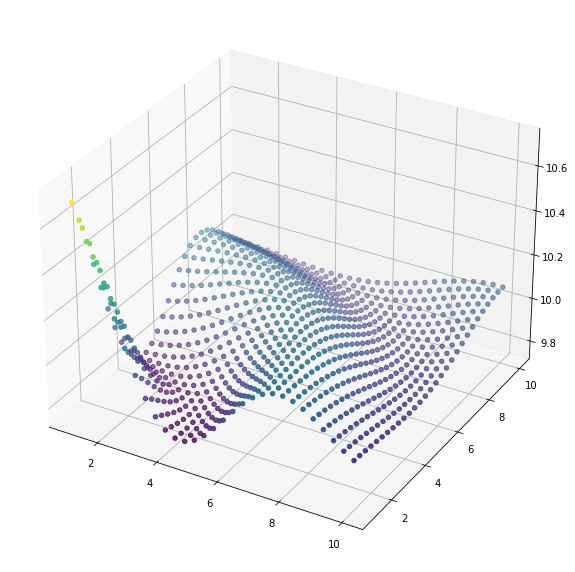

In [126]:
#%% Generacion de un hyperplano
#np.random.seed(1)
lmin = 1
lmax = 10
n = 29
Xm = genX(lmin=lmin,lmax=lmax,npoints=n)
#y = testfunction1(X=Xm,noise=True)
#y = testfunction2(X=Xm,noise=True)
y = testfunction3(X=Xm,noise=False)
#y = testfunction4(X=Xm,noise=True)

nsamples=Xm.shape[0]

#%% Visualizar los datos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y)
plt.show()

### Fit and predict

In [127]:
predict = SVR_general_cvxopt(kernel = "rbf", C = 10, epsilon = 0.01, error = 1e-5).fit(Xm, y).predict(Xm)

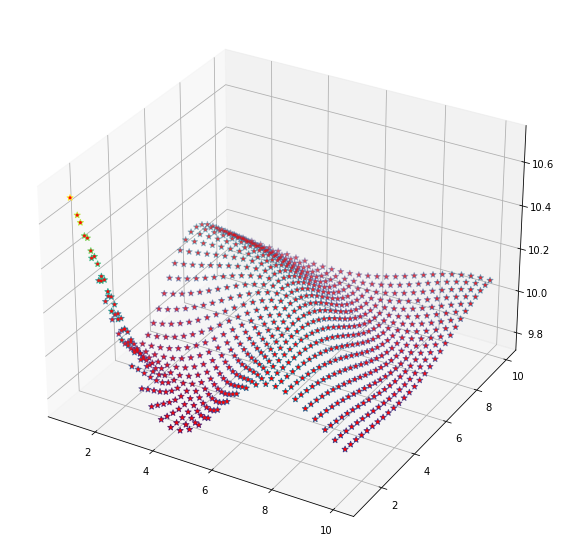

In [128]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y,s=40, marker = '*')
ax.scatter(Xm[:,0],Xm[:,1], predict, c='r',s=4)
#ax.view_init(30, 0)
plt.show()

## CENACE

In [129]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
import pandas as pd

### Load data

In [130]:
y1 =pd.read_excel(r'data//Data1.xlsx').set_index("fecha").loc["2007-01-01":"2020-03-30"]
X1 = pd.read_csv("data//X.csv")

X = X1.drop(["fecha"], axis = 1).to_numpy(); y = y1.to_numpy()

X, X_test, y, y_test = train_test_split(X, y, test_size = 40, shuffle = False)

scaler = MaxAbsScaler(); scaler.fit(X); X = scaler.transform(X)
X_test = scaler.transform(X_test)

scaler1 = MaxAbsScaler(); scaler1.fit(y); y = scaler1.transform(y).reshape(-1)

### Fit data and predict 40 days

In [131]:
predict = SVR_general_cvxopt(kernel = "linear", C = 0.5, epsilon = 5, error = 1e-5).fit(X, y).predict(X_test)

In [132]:
y_pred = scaler1.inverse_transform(predict.reshape(-1, 1))

Kernel: linear
Pred_time: 53s
MAPE: 2.2798922850650043


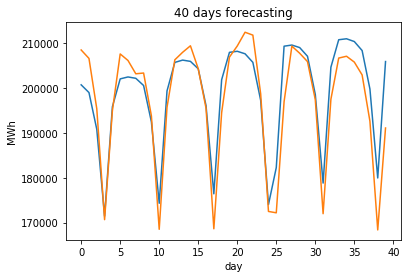

In [134]:
print(f"Kernel: linear\nPred_time: 53s\nMAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}")
plt.title("40 days forecasting")
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel("day")
plt.ylabel("MWh");

In [135]:
predict = SVR_general_cvxopt(kernel = "rbf", C = 0.5, epsilon = 5, error = 1e-5).fit(X, y).predict(X_test)

In [136]:
y_pred = scaler1.inverse_transform(predict.reshape(-1, 1))

Kernel: RBF
Pred_time: 50s
MAPE: 2.0399077028295585


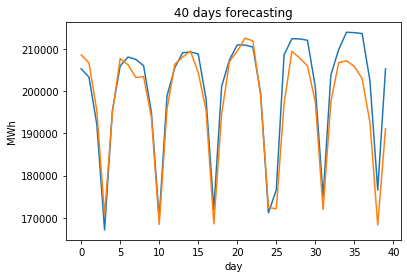

In [138]:
print(f"Kernel: RBF\nPred_time: 50s\nMAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}")
plt.title("40 days forecasting")
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel("day")
plt.ylabel("MWh");